In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import getpass
import ast
from time import sleep 
from random import randint
from IPython.display import clear_output

In [155]:
# este es mi módulo
import mi_modulo

In [156]:
# función para comparar los números
def comparar_numero(numero1, numero2):
        if numero2 > numero1:
            print("El número que has seleccionado es superior al número a adivinar.")
            acierto = 0
            sleep(0.3)
        if numero2 < numero1:
            print("El número que has seleccionado es inferior al número a adivinar.")
            acierto = 0
            sleep(0.3)
        if numero1 == numero2:
            print("Has acertado el número.")
            acierto = 1
            sleep(0.3)
            return acierto    # queremos que si el valor es igual se salga del bucle
        return acierto

In [157]:
# función seleccionar todas las Estadísitcas
def estadis_total (jugador):
    df_estadis = pd.read_excel("Datos.xlsx")
    variable = df_estadis.iloc[jugador]
    print(variable)

In [158]:
# función para hacer el gráfico de intentos del jugador
def grafico (jugador):
    df_grafico = pd.read_excel("Datos.xlsx")
    lista_jug = df_grafico.iloc[jugador, 1]
    lista_num = ast.literal_eval(lista_jug) # esto convierte los character a numeric
    plt.plot(lista_num)
    plt.title("Gráfica de Valores")
    plt.xlabel("Intento")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()

In [159]:
# función para hacer la media de intentos del jugador
def media_jug(jugador):
    df_lista = pd.read_excel("Datos.xlsx")
    lista_jug = df_lista.iloc[jugador, 1]
    lista_num = ast.literal_eval(lista_jug)
    media = np.mean(lista_num)
    print(round(media,2))

In [160]:
# función para saber si el jugador acierta o no
def acierto_o_no(jugador):
    df_lista = pd.read_excel("Datos.xlsx")
    acierto_sn = df_lista.iloc[jugador, 4]
    print(acierto_sn)

In [161]:
def estadistica():
    try:
        # Cargar el archivo de datos
        df = pd.read_excel("Datos.xlsx")
        nombres_jugadores = df.iloc[:, 0]
        print(f"Jugadores disponibles: \n{nombres_jugadores}")
        sleep(0.3)
        
        # Selección de jugador
        while True:
            clear_output(wait=True)
            try:
                jugador_n = int(input(f"Selecciona el jugador cuyos datos desea leer (0 - {len(nombres_jugadores) - 1}): "))
                
                # Verifica que el número esté dentro del rango
                if 0 <= jugador_n < len(nombres_jugadores):
                    break
                else:
                    print("Error: El número ingresado está fuera del rango. Intenta nuevamente.")
                    sleep(0.5)
            except ValueError:
                print("Error: Por favor, ingresa un número entero válido.")
                sleep(0.5)

        # Menú de selección de estadísticas
        while True:    
            try:
                estadistica_selecc = int(input(f"\nMENU:\n"
                                               f"Selecciona 0, 1, 2, 3 o 4.\n"
                                               f"0. Estadísticas completas.\n"
                                               f"1. Gráfico intentos.\n"
                                               f"2. Media de selección.\n"
                                               f"3. Acierto o no.\n"
                                               f"4. Atrás.\n"))
                
                # Asegura que el valor esté en las opciones disponibles
                if estadistica_selecc in [0, 1, 2, 3, 4]:
                    return estadistica_selecc, jugador_n
                else:
                    print("El valor debe ser 0, 1, 2, 3 o 4.")
                    sleep(0.5)
            except ValueError:
                print("Error: Por favor, ingresa un número entero válido.")
                sleep(0.5)

    except FileNotFoundError:
        print("Error: El archivo 'Datos.xlsx' no se encontró.")
        sleep(0.2)
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
        sleep(0.2)


In [162]:
# para utilizar la seleccion
def operaciones(estadistico, jugador):
    if estadistico == 0:
        estadis_total(jugador)
        sleep(1)
    if estadistico == 1:
        grafico(jugador)
        sleep(1)
    if estadistico == 2:
        media_jug(jugador)
        sleep(1)
    if estadistico == 3:
        acierto_o_no(jugador)  
        sleep(1)

In [163]:
# función seleccionar modo
def seleccionar_modo():
    while True:
        try:
            selec_modo = int(input(f"MENU:\n"
                            f"Selecciona 1, 2, 3 o 4.\n"
                            f"1. Partida modo solitario.\n"
                            f"2. Partida 2 jugadores.\n"
                            f"3. Estadística.\n"
                            f"4. Salir."))
            if selec_modo not in [1, 2, 3, 4]:  # nos aseguramos que el valor sea el que queremos 
                raise ValueError
            return selec_modo
        except ValueError:
            print("El valor debe ser 1, 2, 3 o 4")
            sleep(0.7)

In [164]:
# función seleccionar dificultad adaptada
def seleccionar_dificultad_adaptada():
    while True:
        try:
            selec_dificultad_adaptativa = int(input(f"DIFICULTAD ADAPTADA:\n"
                                            f"Selecciona 1, 2, 3 o 4.\n"
                                            f"1. Rango 500.\n"
                                            f"2. Rango 1500.\n"
                                            f"3. Rango 3000.\n"
                                            f"4. No."))
            if selec_dificultad_adaptativa not in [1, 2, 3, 4]:   # nos aseguramos que el valor sea el que queremos 
                raise ValueError
            break
        except ValueError:
            print("El valor debe ser 1, 2, 3 o 4")
            sleep(0.7)
# asignamos los valores de los intentos a continuación y el valor de salida
    if selec_dificultad_adaptativa == 1:
        devuelve_dificultad_adaptativa = 500
    if selec_dificultad_adaptativa == 2:
        devuelve_dificultad_adaptativa = 1500
    if selec_dificultad_adaptativa == 3:
        devuelve_dificultad_adaptativa = 3000
    if selec_dificultad_adaptativa == 4:
        devuelve_dificultad_adaptativa = 1000
    return devuelve_dificultad_adaptativa

In [165]:
# para generar el número con el que comparar
def aleatorizar_o_no(seleccion):
    rango = seleccionar_dificultad_adaptada()  # Esto nos va a permitir jugar con el rango
    if seleccion == 1:
        numero_generado = randint(1, rango)
        return numero_generado, rango  # Asegúrate de retornar el número generado
    
    elif seleccion == 2:
        while True:
            try:
                numero_generado = int(getpass.getpass(f"Ingrese un número del 1 al {rango}: "))
                if numero_generado < 1 or numero_generado > rango:  # nos aseguramos que esté dentro del rango
                    raise ValueError
                return numero_generado, rango
            except ValueError:
                print(f"El valor debe ser un número del 1 al {rango}")
                sleep(0.7)

In [166]:
# función seleccionar modo
def seleccionar_dificultad():
    while True:
        try:
            selec_dificultad = int(input(f"DIFICULTAD:\n"
                                         f"Selecciona 1, 2 o 3.\n"
                                         f"1. Fácil (20 intentos).\n"
                                         f"2. Medio (12 intentos).\n"
                                         f"3. Difícil (5 intentos).\n"
                                         f"4. Atrás."))
            if selec_dificultad not in [1, 2, 3, 4]:   # nos aseguramos que el valor sea el que queremos 
                raise ValueError
            break
        except ValueError:
            print("El valor debe ser 1, 2, 3 o 4")
            sleep(0.7)
# asignamos los valores de los intentos a continuación y el valor de salida
    if selec_dificultad == 1:
        devuelve_dificultad = 19
    if selec_dificultad == 2:
        devuelve_dificultad = 11
    if selec_dificultad == 3:
        devuelve_dificultad = 4
    if selec_dificultad == 4:
        devuelve_dificultad = 3
    return devuelve_dificultad 
        

In [167]:
# función para estructurar el juego
def jugar_adivinanza():
    while True:  
        modo = seleccionar_modo()
        if modo == 3:
            while True:
                clear_output(wait=True)
                tipo_estadis, jugador_num = estadistica()
                if tipo_estadis == 4:
                    break
                else:
                    operaciones(tipo_estadis, jugador_num)
                    break
        elif modo == 4:
            print("Saliendo del juego.")
            break
        else:
            while True:  
                dificultad = seleccionar_dificultad() 
                if dificultad == 3:
                    break  # Salir si se selecciona la opción 4
                
                n_adivinar, rango = aleatorizar_o_no(modo)  # Obtener el número a adivinar
                limite = 0
                primer_numero = n_adivinar  # Suponiendo que `n_adivinar` es el número a adivinar
                lista_valores = []
                
                while True:
                    clear_output(wait=True)
                    while True:
                        try:
                            numero_segundo_jugador = int(input("Adivine el número: "))
                            if numero_segundo_jugador < 1 or numero_segundo_jugador > rango:  # Asegurarse que esté dentro del rango
                                raise ValueError
                            break  # Salir del bucle si la entrada es válida
                        except ValueError:
                            print(f"El valor debe ser un número del 1 al {rango}")
                            sleep(0.3)
                    
                    lista_valores.append(numero_segundo_jugador)
                    limite += 1
                    
                    if limite > dificultad:
                        print(f"Has alcanzado el número límite de intentos.\n"
                              f"El número era: {primer_numero}")
                        sleep(0.3)
                        nombre = input("Ingrese su nombre: ")
                        mi_modulo.exportar_data(nombre, lista_valores, limite, False)  # usamos el módulo creado
                        break
    
                    acertar = comparar_numero(primer_numero, numero_segundo_jugador)
                    if acertar == 1:
                        print(f"El número era: {primer_numero}")
                        nombre = input("Ingrese su nombre: ")
                        mi_modulo.exportar_data(nombre, lista_valores, limite, True)  # uso mi módulo
                        break

                print("Partida finalizada. Volviendo a seleccionar el modo.")
                break  # Volver al menú principal después de la partida

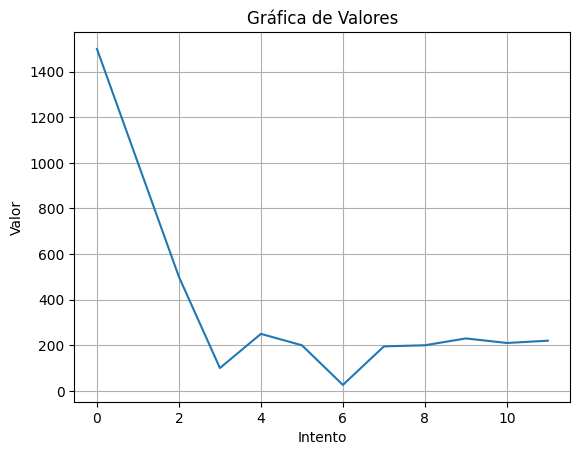

Saliendo del juego.


In [168]:
jugar_adivinanza()